In [223]:
import pandas as pd
df = pd.read_csv('sharks_coords.csv')

# drop attacks we don't have coords for 
df = df.dropna(axis=0, subset=['coords'])

# only look at Unprovoked attacks post 1900
df = df[(df.year>1900) & (df.Attack_Type=='Unprovoked Incidents')]

# create subsets for fatal and non-fatal attacks
df_f = df[(df.Fatal==True)]
df_nf= df[(df.Fatal==False)]

In [224]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
df_f.head()

,Case Number,Date,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Species,Investigator or Source,Attack_Type,Fatal,year,month,day,coords,latitude,longitude
3,ND.0004,Before 1903,AUSTRALIA,Western Australia,NaN,pearl_diving,Ahmun,M,NaN,FATAL,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",Unprovoked Incidents,True,1903,NaN,NaN,"(-27.6728168, 121.6283098)",-27.672817,121.628310
4,ND.0005,Before 1903,AUSTRALIA,Western Australia,Roebuck Bay,diving,male,M,NaN,FATAL,...,NaN,"H. Taunton; N. Bartlett, p. 234",Unprovoked Incidents,True,1903,NaN,NaN,"(-17.9804184, 122.2285171)",-17.980418,122.228517
5,ND.0006,Before 1906,AUSTRALIA,New South Wales,,swimming,Arab boy,M,NaN,FATAL,...,said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",Unprovoked Incidents,True,1906,NaN,NaN,"(-33.864174, 151.2052868)",-33.864174,151.205287
6,ND.0007,Before 1906,AUSTRALIA,NaN,NaN,fishing,fisherman,M,NaN,FATAL,...,blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",Unprovoked Incidents,True,1906,NaN,NaN,"(-25.274398, 133.775136)",-25.274398,133.775136
7,ND.0008,Before 1906,AUSTRALIA,NaN,NaN,fishing,fisherman,M,NaN,FATAL,...,blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",Unprovoked Incidents,True,1906,NaN,NaN,"(-25.274398, 133.775136)",-25.274398,133.775136


In [246]:
##California Plot
CA_map = Basemap(projection='mill', resolution='l',
    llcrnrlon=-128, llcrnrlat=32,
    urcrnrlon=-115, urcrnrlat=42)

plt.figure(figsize=(18,10))

# coords for fatal attacks 
x1,y1 = CA_map(zip(*df_f[(df_f.Area=='California')][['longitude','latitude']]))
x2,y2 = CA_map(lon_NF,lat_NF)

CA_map.plot(x2,y2, 'bo', markersize=5,alpha=.5)
CA_map.plot(x1,y1, 'ro', markersize=5)

# map.drawlsmask(lakes=False)
# map.drawcoastlines(color='gray')
# map.fillcontinents(color = 'lightgrey')
# map.drawmapboundary()
# map.drawstates()
# map.bluemarble(alpha=.2)

plt.show()

TypeError: __call__() missing 1 required positional argument: 'y'

In [249]:
y,z = zip(df_f[(df_f.Area=='California')][['longitude','latitude']])
print(z)

('latitude',)


In [218]:
# looks like we have some points that are rather far from the coast, clustering
from sklearn import neighbors
import numpy as np

In [221]:
# create numpy array for all coords and a tree
coords = np.column_stack((df.latitude,df.longitude))

tree = neighbors.KDTree(coords,leaf_size=2)
dist, ind = tree.query(coords[3], k=5)     
print(ind[0])  # indices of 3 closest neighbors
print(dist[0])  # distances to 3 closest neighbors

[750 384   5 387   3]
[ 0.  0.  0.  0.  0.]


In [222]:
sums = []
for i in range(len(coords)):
    dist, ind = tree.query(coords[i], k=5)
    sums.append(np.sum(dist))
    
coords_sum = pd.Series(sums, name='dist_sums')
df = df.join(coords_sum)

In [88]:
AUS_post_1900 = df[(df.Country=='AUSTRALIA') & (df.year>1900) & (df.Attack_Type=='Unprovoked Incidents')]
len(AUS_post_1900)

761

In [89]:
AUS_lat_F = AUS_post_1900[AUS_post_1900['Fatal']==True]['latitude'].dropna().tolist()
AUS_lon_F = AUS_post_1900[AUS_post_1900['Fatal']==True]['longitude'].dropna().tolist()

AUS_lat_NF = AUS_post_1900[AUS_post_1900['Fatal']==False]['latitude'].dropna().tolist()
AUS_lon_NF = AUS_post_1900[AUS_post_1900['Fatal']==False]['longitude'].dropna().tolist()

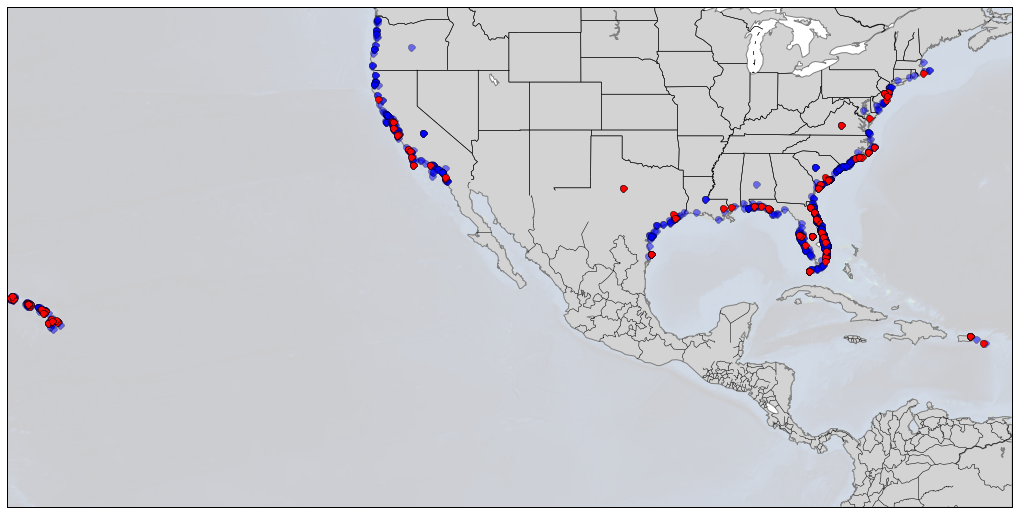

In [92]:
# USA Plot
map = Basemap(projection='mill', resolution = 'l',
    llcrnrlon=-160, llcrnrlat=2,
    urcrnrlon=-62, urcrnrlat=47)
              
plt.figure(figsize=(18,18))

x1,y1 = map(lon_F_USA, lat_F_USA)
x2,y2 = map(lon_NF_USA,lat_NF_USA)
map.plot(x2,y2, 'bo', markersize=7,alpha=.5)
map.plot(x1,y1, 'ro', markersize=7)

map.drawlsmask(lakes=False)
map.drawcoastlines(color='gray')
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary()
map.drawstates()
map.bluemarble(alpha=.2)

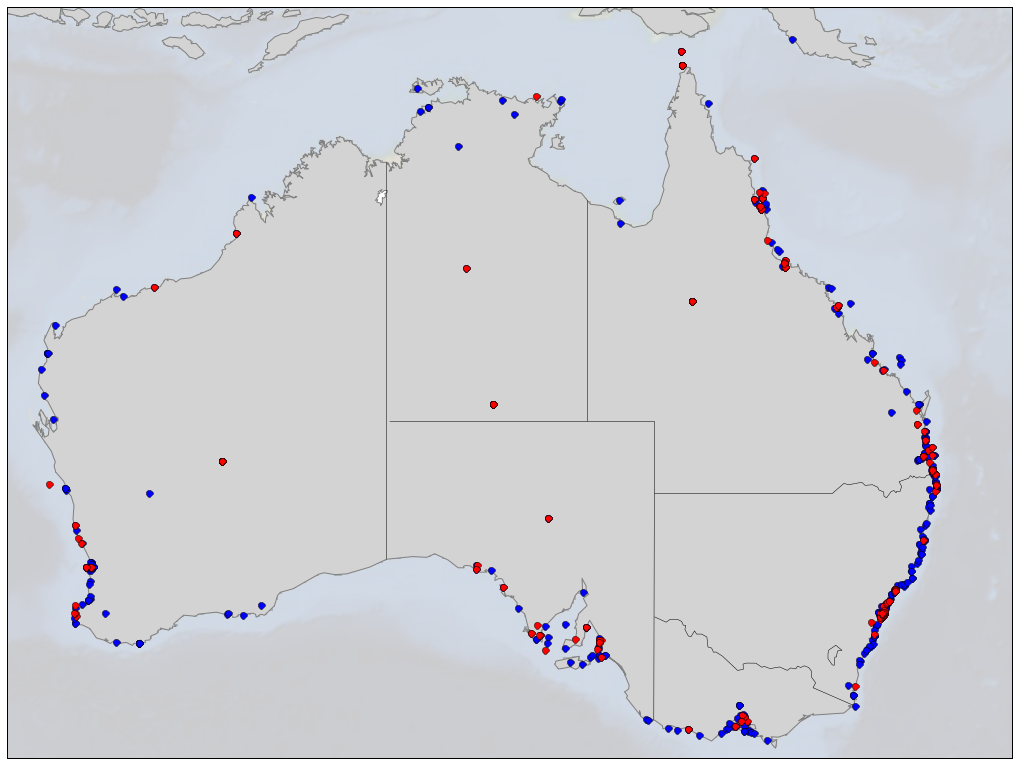

In [93]:
# AUS Plot

map = Basemap(projection='mill', resolution = 'l',
    llcrnrlon=112, llcrnrlat=-39.5,
    urcrnrlon=157, urcrnrlat=-8)
              
plt.figure(figsize=(18,18))
x1,y1 = map(AUS_lon_F,AUS_lat_F)
x2,y2 = map(AUS_lon_NF,AUS_lat_NF)
map.plot(x2,y2, 'bo', markersize=7)
map.plot(x1,y1, 'ro', markersize=7)

map.drawlsmask(lakes=False)
map.drawcoastlines(color='gray')
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary()
map.drawstates()
map.bluemarble(alpha=.2)

plt.show()

In [36]:
from sklearn import neighbors
import numpy as np

In [206]:
coords = np.column_stack((df.latitude,df.longitude))